Soluciones Bodega de datos Rapidos y Furiosos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from connection_script import get_engine  # Importa el método de conexión si ya lo tienes configurado

Crear los dataframes a utilizar 

In [2]:
# Conectar a la base de datos ETL
engine_etl = get_engine('etl_rapidos_furiosos')

# Cargar los datos de las tablas en DataFrames globales
df_fechas = pd.read_sql("SELECT * FROM fechas;", engine_etl)
df_servicios = pd.read_sql("SELECT * FROM servicios;", engine_etl)
df_novedades = pd.read_sql("SELECT * FROM novedades;", engine_etl)
df_sedes = pd.read_sql("SELECT * FROM sedes;", engine_etl)



In [3]:


# Convertir la columna 'fecha_solicitud' a formato de fecha si no está en ese formato
df_servicios['fecha_solicitud'] = pd.to_datetime(df_servicios['fecha_solicitud'], errors='coerce')

# Extraer el mes de la fecha de solicitud
df_servicios['mes'] = df_servicios['fecha_solicitud'].dt.month

# Contar el número de servicios por mes
servicios_por_mes = df_servicios['mes'].value_counts().sort_index()
servicios_por_mes.index = servicios_por_mes.index.map({1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio', 
                                                       7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 
                                                       11: 'Noviembre', 12: 'Diciembre'})

# Mostrar los servicios por mes en una tabla
print("Número de servicios por mes:")
print(servicios_por_mes)

Número de servicios por mes:
mes
Enero          287
Febrero       2358
Marzo         3222
Abril         4313
Mayo          4642
Junio         4093
Julio         4482
Agosto        4245
Septiembre      19
Octubre          9
Noviembre        9
Diciembre       23
Name: count, dtype: int64


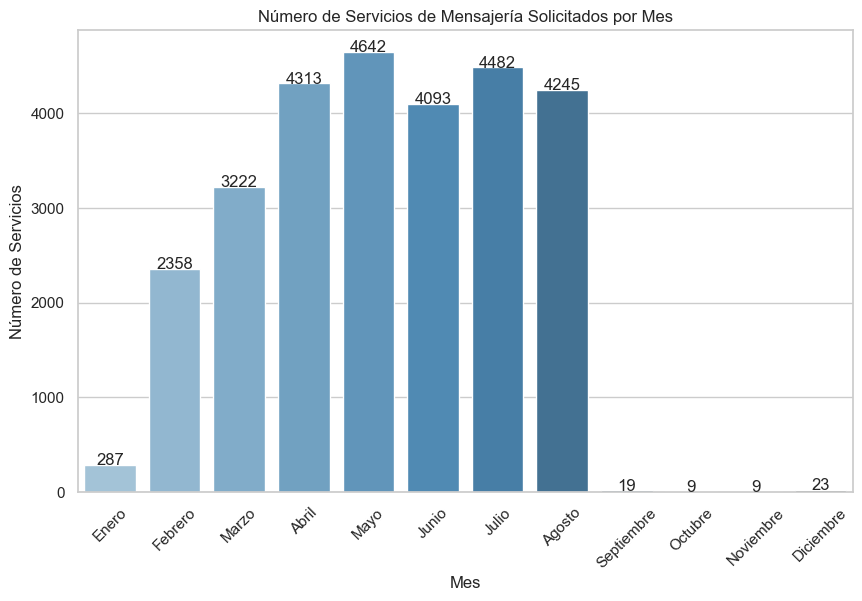

In [4]:
# Configuración de estilo para el gráfico
sns.set(style="whitegrid")

# Crear un gráfico de barras con hue y legend=False
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=servicios_por_mes.index, y=servicios_por_mes.values, hue=servicios_por_mes.index, palette="Blues_d")

# Etiquetas y título del gráfico
plt.xlabel("Mes")
plt.ylabel("Número de Servicios")
plt.title("Número de Servicios de Mensajería Solicitados por Mes")
plt.xticks(rotation=45)

# Agregar el valor encima de cada barra
for index, value in enumerate(servicios_por_mes.values):
    ax.text(index, value + 0.5, f'{value}', ha='center')

plt.show()


2) Cuáles son los días donde más solicitudes hay.

In [5]:
# Realizar el merge para obtener el nombre del día
df_merged = pd.merge(df_servicios, df_fechas[['id_fecha', 'nombre_dia']], 
                     left_on='id_fecha_solicitud', right_on='id_fecha', how='left')

# Contar las solicitudes por día de la semana
solicitudes_por_dia = df_merged['nombre_dia'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

In [6]:

# Crear el DataFrame para la tabla
tabla_solicitudes_por_dia = pd.DataFrame({
    "Día de la Semana": solicitudes_por_dia.index,
    "Número de Solicitudes": solicitudes_por_dia.values
})

# Mostrar la tabla
print("Tabla de Solicitudes de Mensajería por Día de la Semana:")
display(tabla_solicitudes_por_dia)


# Agregar el valor encima de cada barra
for index, value in enumerate(solicitudes_por_dia.values):
    ax.text(index, value + 0.5, f'{value}', ha='center')

plt.show()


Tabla de Solicitudes de Mensajería por Día de la Semana:


,Día de la Semana,Número de Solicitudes
0,Monday,4193
1,Tuesday,5261
2,Wednesday,4826
3,Thursday,5016
4,Friday,5163
5,Saturday,2425
6,Sunday,818


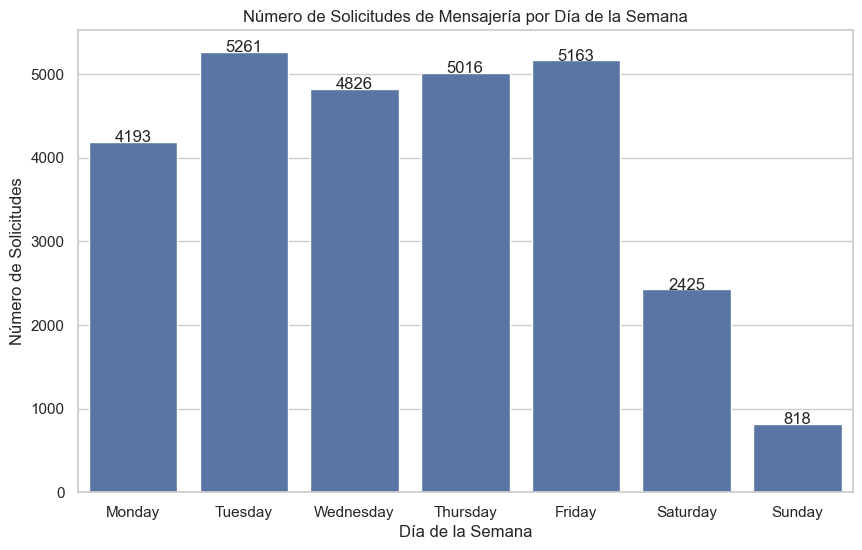

In [7]:


# Graficar el número de solicitudes por día de la semana
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=solicitudes_por_dia.index, y=solicitudes_por_dia.values)

# Etiquetas y título del gráfico
plt.xlabel("Día de la Semana")
plt.ylabel("Número de Solicitudes")
plt.title("Número de Solicitudes de Mensajería por Día de la Semana")

# Agregar el valor encima de cada barra
for index, value in enumerate(solicitudes_por_dia.values):
    ax.text(index, value + 0.5, f'{value}', ha='center')

plt.show()


3) A qué hora los mensajeros están más ocupados.

In [8]:
# Verificar valores antes de la conversión
print("Valores antes de la conversión en 'hora_solicitud':")
print(df_servicios['hora_solicitud'].head())

# Intentar convertir las columnas de hora
df_servicios['hora_solicitud'] = pd.to_datetime(df_servicios['hora_solicitud'], format='%H:%M:%S', errors='coerce').dt.hour
df_servicios['hora_mensajero_asignado'] = pd.to_datetime(df_servicios['hora_mensajero_asignado'],format='%H:%M:%S',  errors='coerce').dt.hour
df_servicios['hora_recogida'] = pd.to_datetime(df_servicios['hora_recogida'],format='%H:%M:%S',  errors='coerce').dt.hour
df_servicios['hora_entrega'] = pd.to_datetime(df_servicios['hora_entrega'],format='%H:%M:%S',  errors='coerce').dt.hour
df_servicios['hora_cerrado'] = pd.to_datetime(df_servicios['hora_cerrado'],format='%H:%M:%S',  errors='coerce').dt.hour

# Verificar valores después de la conversión
print("Valores después de la conversión en 'hora_solicitud':")
print(df_servicios['hora_solicitud'].head())

# Verificar si hay NaN después de la conversión
print("¿Hay valores NaN en 'hora_solicitud'?")
print(df_servicios['hora_solicitud'].isna().sum())

# Si encuentras NaN, puedes proceder a limpiarlos (eliminando filas o asignando valores predeterminados)
# Ejemplo: eliminar filas con NaN
df_servicios = df_servicios.dropna(subset=['hora_solicitud'])

# Concatenar las horas nuevamente si es necesario
todas_las_horas = pd.concat([
    df_servicios['hora_solicitud'], 
    df_servicios['hora_mensajero_asignado'], 
    df_servicios['hora_recogida'], 
    df_servicios['hora_entrega'], 
    df_servicios['hora_cerrado']
])

# Verificar las horas concatenadas
print(todas_las_horas.head())
# df_servicios['hora_solicitud'].head()


Valores antes de la conversión en 'hora_solicitud':
0    16:22:18
1    16:30:05
2    16:30:05
3    16:35:52
4    16:37:54
Name: hora_solicitud, dtype: object
Valores después de la conversión en 'hora_solicitud':
0    16.0
1    16.0
2    16.0
3    16.0
4    16.0
Name: hora_solicitud, dtype: float64
¿Hay valores NaN en 'hora_solicitud'?
1
0    16.0
1    16.0
2    16.0
3    16.0
4    16.0
dtype: float64


C:\Users\Usuario\AppData\Local\Temp\ipykernel_21292\3933025628.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ocupacion_por_hora.index, y=ocupacion_por_hora.values, palette="coolwarm")


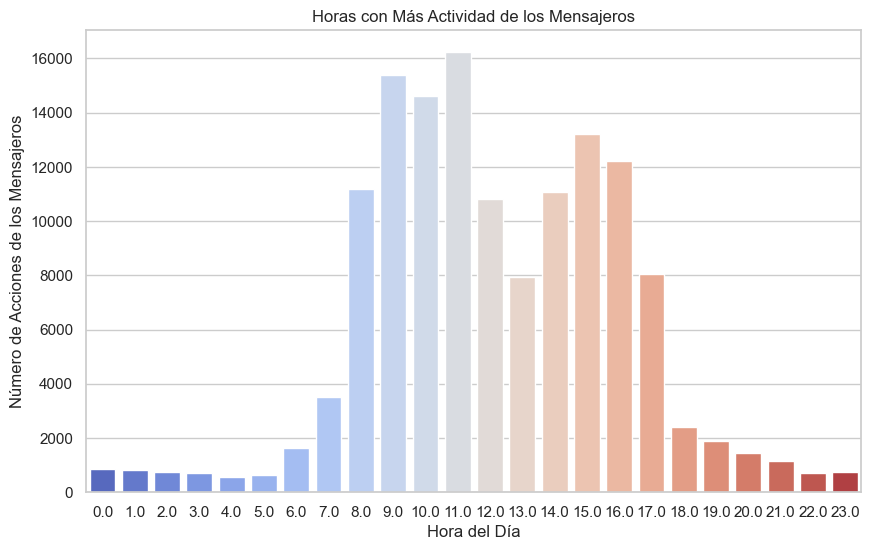

0.0       842
1.0       804
2.0       751
3.0       727
4.0       570
5.0       653
6.0      1615
7.0      3499
8.0     11168
9.0     15369
10.0    14606
11.0    16226
12.0    10815
13.0     7920
14.0    11055
15.0    13195
16.0    12223
17.0     8039
18.0     2418
19.0     1903
20.0     1464
21.0     1138
22.0      717
23.0      748
Name: count, dtype: int64

In [9]:
# Graficar los resultados
# Concatenar todas las horas en un solo DataFrame para analizarlas juntas
todas_las_horas = pd.concat([
    df_servicios['hora_solicitud'], 
    df_servicios['hora_mensajero_asignado'], 
    df_servicios['hora_recogida'], 
    df_servicios['hora_entrega'], 
    df_servicios['hora_cerrado']
])

# Contar las ocurrencias de cada hora
ocupacion_por_hora = todas_las_horas.value_counts().sort_index()

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=ocupacion_por_hora.index, y=ocupacion_por_hora.values, palette="coolwarm")

# Etiquetas y título del gráfico
plt.xlabel("Hora del Día")
plt.ylabel("Número de Acciones de los Mensajeros")
plt.title("Horas con Más Actividad de los Mensajeros")
plt.xticks(range(24))  # Asegúrate de mostrar todas las horas
plt.show()

# Mostrar la tabla de resultados
ocupacion_por_hora

4) Número de servicios solicitados por cliente y por mes

In [ ]:
import pandas as pd

# Verificar la cantidad de datos en df_servicios
#print("Datos en df_servicios:")
#print(df_servicios.info())
#print("Primeras filas de df_servicios:")
#print(df_servicios.head())

# Verificar las primeras filas de df_fechas
#print("Primeras filas de df_fechas:")
#print(df_fechas.head())

# Convertir la columna 'fecha_solicitud' a datetime si no lo está
df_servicios['fecha_solicitud'] = pd.to_datetime(df_servicios['fecha_solicitud'], errors='coerce')

# Comprobar si hay valores NaT después de la conversión
#print("Valores NaT en 'fecha_solicitud':")
#print(df_servicios['fecha_solicitud'].isna().sum())

# Mostrar las fechas que no se pudieron convertir
print("Fechas no convertibles:")
print(df_servicios[df_servicios['fecha_solicitud'].isna()]['fecha_solicitud'])

# Extraer mes y año de la columna 'fecha_solicitud'
df_servicios['mes'] = df_servicios['fecha_solicitud'].dt.month
df_servicios['año'] = df_servicios['fecha_solicitud'].dt.year

# Verificar las nuevas columnas 'mes' y 'año'
print("Mes y año extraídos:")
print(df_servicios[['fecha_solicitud', 'mes', 'año']].head())

# Agrupar por 'id_cliente', 'mes' y 'año' y contar los servicios solicitados
servicios_por_cliente_mes = df_servicios.groupby(['id_cliente', 'mes', 'año']).size().reset_index(name='numero_servicios')

# Mostrar el resultado del agrupamiento en formato tabla
print("\nTabla: Número de servicios por cliente y mes:")
print(servicios_por_cliente_mes)

# Unir con df_fechas para obtener nombres de meses
servicios_por_cliente_mes = servicios_por_cliente_mes.merge(df_fechas[['mes', 'nombre_mes']], on='mes', how='left')

# Organizar el resultado final para mejor visualización
servicios_por_cliente_mes = servicios_por_cliente_mes[['id_cliente', 'nombre_mes', 'año', 'numero_servicios']]

# Mostrar el resultado final con nombres de meses en formato tabla
print("\nTabla final: Servicios por cliente y mes con nombres de meses:")
print(servicios_por_cliente_mes)


Datos en df_servicios:
<class 'pandas.core.frame.DataFrame'>
Index: 27702 entries, 0 to 27702
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id_servicio                  27702 non-null  int64         
 1   id_cliente                   27702 non-null  int64         
 2   id_mensajero                 27702 non-null  int64         
 3   id_fecha_solicitud           27702 non-null  float64       
 4   id_fecha_mensajero_asignado  27702 non-null  int64         
 5   id_fecha_recogida            27702 non-null  int64         
 6   id_fecha_entrega             27702 non-null  int64         
 7   id_fecha_cerrado             27702 non-null  int64         
 8   hora_solicitud               27702 non-null  float64       
 9   hora_mensajero_asignado      27702 non-null  int32         
 10  hora_recogida                27685 non-null  float64       
 11  hora_entrega           

5) Mensajeros más eficientes (Los que más servicios prestan)

In [11]:
query_resumen = """
SELECT 
    m.id_mensajero,
    m.nombre_mensajero,
    COUNT(s.id_mensajero) AS cantidad_servicios
FROM 
    servicios s
JOIN 
    mensajero m ON s.id_mensajero = m.id_mensajero
GROUP BY 
    m.id_mensajero
ORDER BY 
    cantidad_servicios DESC;

"""

df_mensajero_resumen = pd.read_sql(query_resumen, engine_etl)

df_mensajero_resumen.head(10)

,id_mensajero,nombre_mensajero,cantidad_servicios
0,30,,2419
1,29,,1527
2,15,pepito_el_rapido pepito_el_furioso,1522
3,25,,1420
4,31,,1346
5,41,,1335
6,16,pepito_el_rapido pepito_el_furioso,1332
7,22,pepito_el_rapido pepito_el_furioso,1281
8,42,pepito_el_rapido pepito_el_furioso,1272
9,28,,1219


6) Cuáles son las sedes que más servicios solicitan por cada cliente.

In [12]:
# Unir las tablas de servicios y sedes por 'id_cliente'
df_unido = pd.merge(df_servicios, df_sedes, on='id_cliente')

# Agrupar por id_cliente y id_sede, y contar el número de servicios diferentes (usando id_servicio)
df_servicios_por_sede = df_unido.groupby(['id_cliente', 'id_sede']).agg(
    num_servicios=('id_servicio', 'nunique')  # Cuenta los servicios únicos por cliente y sede
).reset_index()

# Ordenar de manera descendente para encontrar las sedes con más servicios solicitados por cada cliente
df_max_servicios = df_servicios_por_sede.sort_values(by=['id_cliente', 'num_servicios'], ascending=[True, False])

# Mostrar los resultados
display(df_max_servicios)

# Unir las tablas de servicios y sedes por 'id_cliente'
df_unido = pd.merge(df_servicios, df_sedes, on='id_cliente')

# Agrupar por id_cliente y contar el número total de servicios solicitados por cada cliente
df_servicios_por_cliente = df_unido.groupby('id_cliente').agg(
    num_servicios=('id_servicio', 'nunique')  # Contamos los servicios únicos por cliente
).reset_index()

# Mostrar los resultados
display(df_servicios_por_cliente)

,id_cliente,id_sede,num_servicios
0,2,1,18
1,2,2,18
2,3,38,192
3,4,10,113
4,4,11,113
5,4,12,113
6,4,13,113
7,4,14,113
8,5,3,4541
9,5,4,4541


,id_cliente,num_servicios
0,2,18
1,3,192
2,4,113
3,5,4541
4,6,289
5,7,2214
6,8,289
7,9,642
8,11,16941
9,12,1387


7) Cuál es el tiempo promedio de entrega desde que se solicita el servicio hasta que se cierra el caso.

In [13]:
# filtrar los servicios que no fueron cerrados. si tiene cero en  tiempo_entregado_cerrado es porque no fue cerrado
df_servicios_cerrados = df_servicios[df_servicios['tiempo_entrega_cerrado'] > 0]
df_servicios_cerrados["duracion_total"].head()

duracion_total_promedio = df_servicios_cerrados["duracion_total"].mean()

print("Duración total promedio: ",duracion_total_promedio)

Duración total promedio:  7.484738810471709


8) Mostrar los tiempos de espera por cada fase del servicio: Iniciado, Con mensajero asignado, recogido en origen, Entregado en Destino, Cerrado. En que fase del servicio hay más demoras?

In [14]:
# print tiempo de espera por cada fase del servicio
df_tiempos_espera = df_servicios_cerrados[["id_servicio", "tiempo_espera", "tiempo_mensajero_recogida", "tiempo_recogida_entrega", "tiempo_entrega_cerrado"]].copy()
print("Tiempos de espera por fase del servicio:")

#rename tiempo_espera a tempo_solicitado_mensajero_asisgnado
df_tiempos_espera.rename(columns={"tiempo_espera": "tiempo_solicitado_mensajero_asisgnado"}, inplace=True)

df_tiempos_espera.head()


Tiempos de espera por fase del servicio:


,id_servicio,tiempo_solicitado_mensajero_asisgnado,tiempo_mensajero_recogida,tiempo_recogida_entrega,tiempo_entrega_cerrado
5,12,428.975000,514.896944,0.046111,0.027222
6,13,428.271111,154.776944,1923.615278,0.008056
7,14,428.125833,3314.886944,20.154444,772.212222
9,16,427.743056,2078.735278,0.007500,0.005278
10,17,2.935833,0.343056,0.001667,0.000833


In [15]:
# qué tiempos promedio
tiempo_promedio_espera = df_tiempos_espera[
  [
    "tiempo_solicitado_mensajero_asisgnado",
    "tiempo_mensajero_recogida",
    "tiempo_recogida_entrega",
    "tiempo_entrega_cerrado"
  ]
  ].copy().mean()
print("Tiempos promedio de espera por fase del servicio en horas:")




print(tiempo_promedio_espera.head())

fase_mayor_tiempo = tiempo_promedio_espera.idxmax()

# Imprimir la etiqueta
print("La fase con el mayor tiempo promedio de espera es:", fase_mayor_tiempo)

Tiempos promedio de espera por fase del servicio en horas:
tiempo_solicitado_mensajero_asisgnado    3.857403
tiempo_mensajero_recogida                2.212448
tiempo_recogida_entrega                  1.408155
tiempo_entrega_cerrado                   4.866447
dtype: float64
La fase con el mayor tiempo promedio de espera es: tiempo_entrega_cerrado


9) Cuáles son las novedades que más se presentan durante la prestación del servicio?

In [16]:
from connection_script import get_engine
import pandas as pd
from sqlalchemy import text

# Obtener la conexión a la base de datos ETL
engine_etl = get_engine('etl_rapidos_furiosos')

def obtener_novedades_mas_comunes():
    # Realizar la consulta SQL con JOIN para obtener la descripción del tipo de novedad
    with engine_etl.connect() as conn_etl:
        query = """
        SELECT tn.nombre AS tipo_novedad, COUNT(n.id_novedad) AS cantidad
        FROM novedades n
        JOIN tipo_novedad tn ON n.id_tipo_novedad = tn.id
        GROUP BY tn.nombre
        ORDER BY cantidad DESC;
        """
        
        # Ejecutar la consulta y cargar los datos en un DataFrame
        df_novedades_comunes = pd.read_sql(query, conn_etl)
        
        # Renombrar columnas para mayor claridad
        df_novedades_comunes.columns = ['Tipo de Novedad', 'Cantidad']
        
    return df_novedades_comunes

# Ejecutar la función y visualizar los resultados
df_novedades_mas_comunes = obtener_novedades_mas_comunes()
print("Novedades más comunes durante la prestación del servicio:")
print(df_novedades_mas_comunes)

Novedades más comunes durante la prestación del servicio:
          Tipo de Novedad  Cantidad
0      No puedo continuar      3892
1  Novedades del servicio      1316


In [21]:
#analisis de la descripcion con IA

import os
import google.generativeai as genai

genai.configure(api_key=os.environ["GEMINI_API_KEY"])

#1. me traigo las 100 primeras descripciones de novedades en un string
descripciones_novedades = df_novedades['descripcion'][:100].str.cat(sep='\n')


# #2. el modelo debe darme tags comunes

# Create the model
generation_config = {
  "temperature": 0.4,
  "top_p": 0.95,
  "top_k": 40,
  "max_output_tokens": 8192,
  "response_mime_type": "text/plain",
}

model = genai.GenerativeModel(
  model_name="gemini-1.5-flash",
  generation_config=generation_config,
)

prompt= """
   te voy a pasar una una lista de descripciones de novedades, dame los tags comunes
   por ejemplo: Esperando muestras la tag es Espera, 
   para Me acabe de pinchar, seria  varada-del-vehiculo
   para me tengo que retirar, seria retirada-del-mensajero
   para Hay trancon en la calle 5, seria trancon

   van a haber mas variaciones, quiero que agregues categorias si es necesario y si la discripcion es muy ambigua dale la tag sin-descripcion.
   casos que suelen ser muy ambiguos:
    - Halo
    - A
    -B
    -A
    -V
    -V
    -C
    -B

    tienes que darme la lista de tags mas comunes. No me devuelvas la misma lista de descripciones.
    por ejemplo: [Espera, Retirada, Trancon, Sin-descripcion ...]

    dame solo la lista de tags. no tienes que explicar nada

"""

chat_session = model.start_chat()

response = chat_session.send_message(prompt + descripciones_novedades)

categorias_string =response.text

print(categorias_string)

#

[Espera, Retirada, Trancon, Sin-descripcion, Varada-del-vehiculo, Demora, Novedad,  Falla-del-vehiculo,  Repuesto,  Sistema,  Pago,  Servicio-suspendido,  Proveedor,  Local-cerrado,  App,  Consignacion,  Devolucion,  Factura,  Laboratorio,  Duplicado] 



In [24]:
df_novedades.iloc[9]["descripcion"]
len(df_novedades)

5208

In [ ]:
def asignar_categoria_con_IA():

    prompt_asignar_categorias = """
        Con  la lista de tags, quiero que las asignes a las descripciones una de esas tags que mejor se acomode.
        por ejemplo:
        - Esperando muestras -> Espera
    quiero que solo me contestes las tags asignadas a las descripciones en forma de lista formato json

    por ejemplo:
            [
                {
                    "id_novedad": 1,
                    "categoria_llm": "Espera"
                },
                {
                    "id_novedad": 2,
                    "categoria_llm": "Retirada"
                },
                ...
            ]

    descripciónes:
        """
    descripciones_novedades = ""
    for i in range(len(df_novedades)-1):
        descripciones_novedades += " id_novedad: " + str(df_novedades.iloc[i]["id_novedad"]) + " descripcion: " + df_novedades.iloc[i]["descripcion"] + "\n"


    prompt_completo = "lista de tags: " + categorias_string + "\n" + prompt_asignar_categorias + descripciones_novedades
    

    asignacion = model.generate_content(prompt_completo)
    asignacion_string = asignacion.text

    return asignacion_string




In [ ]:
import json


json_string_asignacion = asignar_categoria_con_IA()



In [ ]:
clean_json = json_string_asignacion.replace('\n', '').replace('json', '').replace("```","").strip()


clean_json += '" } ]'

json_asignacion = json.loads(clean_json)

#save json
with open('asignacion_llm.json', 'w') as f:
    json.dump(json_asignacion, f)



In [ ]:
df_novedades_categoria_llm = pd.DataFrame(json_asignacion)

# Usar merge para agregar la columna 'descripcion_llm' al DataFrame de novedades
df_novedades = df_novedades.merge(df_novedades_categoria_llm, on='id_novedad', how='left')

print("\nDataFrame de novedades después de la actualización:")
print(df_novedades.head(30))



DataFrame de novedades después de la actualización:
   id_novedad  id_servicio descripcion  id_tipo_novedad  id_mensajero  \
0           4           51           A                1             7   
1           5           51        Halo                1             7   
2           6           51           A                1             7   
3           7           51           B                1             7   
4           8           51           A                1             7   

  fecha_novedad categoria_llm_x  categoria_llm_y  
0    2023-11-30                  Sin-descripcion  
1    2023-11-30                  Sin-descripcion  
2    2023-11-30                  Sin-descripcion  
3    2023-11-30                  Sin-descripcion  
4    2023-11-30                  Sin-descripcion  


In [75]:

df_filtrado = df_novedades[df_novedades["categoria_llm_y"] != "Sin-descripcion"]

conteo_categoria = df_filtrado.groupby("categoria_llm_y").size()

# Ver el resultado
print(conteo_categoria.sort_values(ascending=False))

categoria_llm_y
Espera                 53
Novedad                24
App                    19
Repuesto               16
Local-cerrado          16
Varada-del-vehiculo    15
Demora                 11
Falla-del-vehiculo      9
Servicio-suspendido     6
Devolucion              5
Pago                    4
Consignacion            3
Proveedor               3
Factura                 3
Duplicado               2
Sistema                 2
Trancon                 2
Laboratorio             1
Es                      1
dtype: int64
